In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
pd.__version__

u'0.18.1'

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_train = df_train.drop(["Name", "Ticket", "PassengerId", "Cabin", "Embarked"], axis=1)
df_test = df_test.drop(["Name", "Ticket", "PassengerId", "Cabin", "Embarked"], axis=1)
df_test = pd.get_dummies(df_test, drop_first=True)
df_train = pd.get_dummies(df_train, drop_first=True)

df_train.info()
#print("*********************")
df_test.info()
df_train.head(6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Sex_male    891 non-null float64
dtypes: float64(3), int64(4)
memory usage: 48.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
Pclass      418 non-null int64
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Sex_male    418 non-null float64
dtypes: float64(3), int64(3)
memory usage: 19.7 KB


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,0,3,22.0,1,0,7.2500,1.0
1,1,1,38.0,1,0,71.2833,0.0
2,1,3,26.0,0,0,7.9250,0.0
3,1,1,35.0,1,0,53.1000,0.0
4,0,3,35.0,0,0,8.0500,1.0
5,0,3,NaN,0,0,8.4583,1.0


# Data Preprocessing
Let's examine the train and test datasets, we see that "Age" column is empty for 177 and 86 passengers respectively. Let's look at the distribution of ages

C:\Users\Nursultan\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


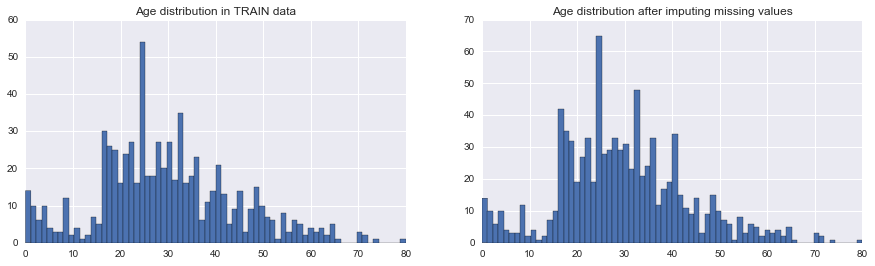

In [3]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Age distribution in TRAIN data')
axis2.set_title('Age distribution after imputing missing values')

average_age_train   = df_train["Age"].mean()
std_age_train       = df_train["Age"].std()
count_missing_age_train = df_train["Age"].isnull().sum()
rand_1 = np.random.randint(average_age_train - std_age_train, 
                           average_age_train + std_age_train,
                           size = count_missing_age_train)
df_train['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

df_train["Age"][np.isnan(df_train["Age"])] = rand_1
df_train['Age'] = df_train['Age'].astype(int)

df_train['Age'].hist(bins=70, ax=axis2)

C:\Users\Nursultan\Anaconda2\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


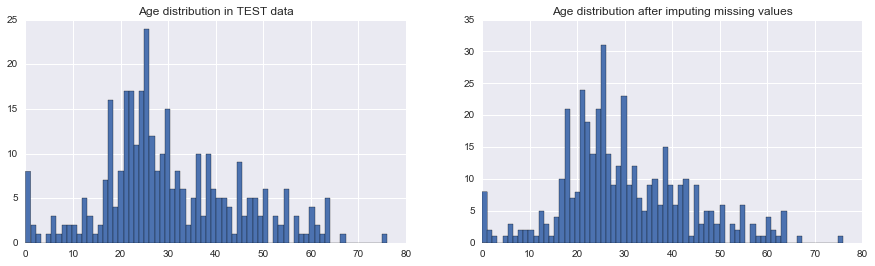

In [4]:
#Let's do the same for test data
fig, (axis3, axis4) = plt.subplots(1,2,figsize=(15,4))
axis3.set_title('Age distribution in TEST data')
axis4.set_title('Age distribution after imputing missing values')

average_age_test = df_test["Age"].mean()
std_age_test = df_test["Age"].std()
count_missing_age_test = df_test["Age"].isnull().sum()
rand_1 = np.random.randint(average_age_test - std_age_test, 
                           average_age_test + std_age_test,
                           size = count_missing_age_test)
df_test['Age'].dropna().astype(int).hist(bins=70, ax=axis3)

df_test["Age"][np.isnan(df_test["Age"])] = rand_1
df_test['Age'] = df_test['Age'].astype(int)


df_test['Age'].hist(bins=70, ax=axis4)


There is a missing fare value in test dataset, let's handle it using mean imputation. 

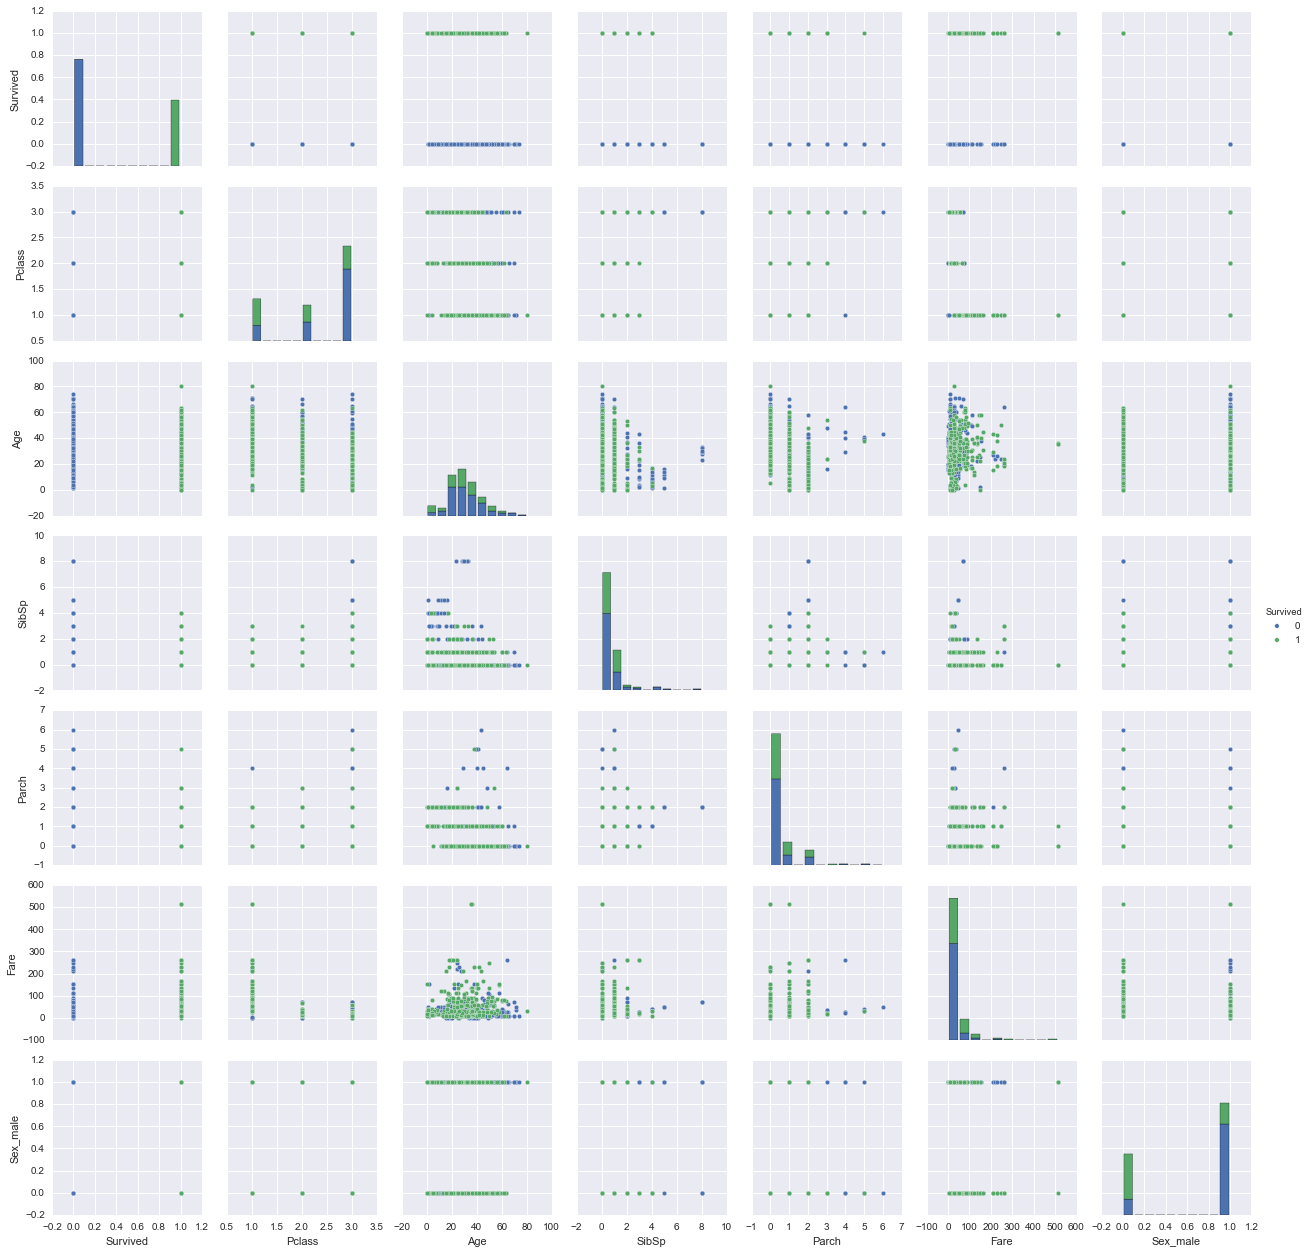

In [7]:
df_test["Fare"].fillna(df_test["Fare"].median(), inplace=True)

seabornMatrix = sns.pairplot(df_train[['Survived', 'Pclass','Age','SibSp','Parch', 'Fare', 'Sex_male']],hue="Survived")

# Combining feature scaling, data compression and learning algorithn in a pipeline

In [17]:
X_train = df_train.iloc[:, 1:].values
y_train = df_train.iloc[:, 0].values
X_test = df_train.iloc[:, 1:].values
y_test = df_train.iloc[:, 0].values
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipe_lr = Pipeline([('scl', StandardScaler()),
            ('pca', PCA(n_components=3)),
            ('clf', LogisticRegression(random_state=1))])

pipe_lr.fit(X_train, y_train)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))
y_pred = pipe_lr.predict(X_test)

Test Accuracy: 0.796


# Stratified k-fold cross-validation and evaluation of performance with learning and validation curves

Fold: 1, Class dist.: [494 307], Acc: 0.800
Fold: 2, Class dist.: [494 307], Acc: 0.800
Fold: 3, Class dist.: [494 308], Acc: 0.775
Fold: 4, Class dist.: [494 308], Acc: 0.798
Fold: 5, Class dist.: [494 308], Acc: 0.798
Fold: 6, Class dist.: [494 308], Acc: 0.775
Fold: 7, Class dist.: [494 308], Acc: 0.787
Fold: 8, Class dist.: [494 308], Acc: 0.764
Fold: 9, Class dist.: [494 308], Acc: 0.820
Fold: 10, Class dist.: [495 308], Acc: 0.807

CV accuracy: 0.792 +/- 0.016


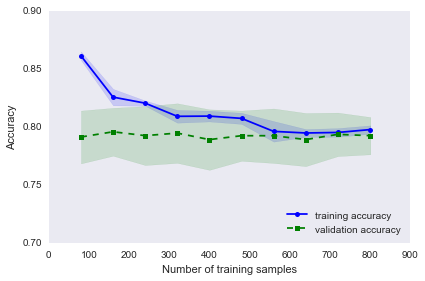

In [21]:
from sklearn.cross_validation import StratifiedKFold

kfold = StratifiedKFold(y=y_train, n_folds=10, random_state = 1)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k+1, np.bincount(y_train[train]),score))

print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve

pipe_lr = Pipeline([('scl', StandardScaler()),
            ('clf', LogisticRegression(penalty='l2', random_state=0))])

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr, 
                X=X_train, 
                y=y_train, 
                train_sizes=np.linspace(0.1, 1.0, 10), 
                cv=10,
                n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes, 
                 train_mean + train_std,
                 train_mean - train_std, 
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(train_sizes, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.7, 0.9])
plt.tight_layout()

By looking at the learning curves above we see that the model has a good bias-variance tradeoff. But let's see if we can achieve higher generalization performance.

 1) Fare                           0.286663
 2) Age                            0.275917
 3) Sex_male                       0.268303
 4) Pclass                         0.084967
 5) SibSp                          0.047929
 6) Parch                          0.036222


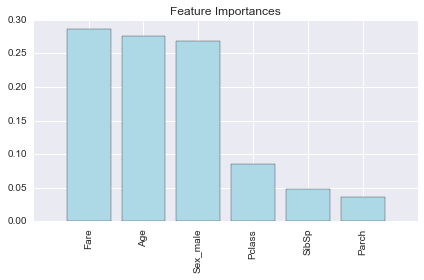

In [26]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_train.columns[1:]

forest = RandomForestClassifier(n_estimators=1000,
                                random_state=0,
                                n_jobs=-1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))
    
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [34]:
important_features = ['Fare', 'Age', 'Sex_male']
X_important_train = df_train[important_features]
X_important_test = df_train[important_features]
X_important.shape
forest.fit(X_important_train, y_train)
y_pred = forest.predict(X_important_test)
forest.score(X_important_train, y_train)

0.98092031425364756